<a href="https://colab.research.google.com/github/Kuriajm/Core_Week6_IP/blob/main/Moringa_School_Core_Data_Science_Ip_Wk_6_11_2021_Mutura_Kuria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mchezo pesa Ltd footballl predictor

**Understanding the question**

**Defining the question**

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**Metric of success**

The model is able to predict any given game depending on its input with over 80% accuracy

**The context**

The model will help mchezo pesa give appropriate odds for its betting clients



**Experimental design**

1. Define the question, the metric for success, the context, experimental  design taken and the appropriateness of the available data to answer the given question
3. Expected flow for the assessment:
4. Perform your EDA
5. Perform any necessary feature engineering 
6. Check of multicollinearity
7. Start building the model
8. Cross-validate the model
9. Compute RMSE
10. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
11. Perform appropriate regressions on the data including your justification
12. Challenge your solution by providing insights on how you can make improvements.

**Prelimimeries**

In [2]:
#Importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading our ranking dataset and viewing 

dfrank = pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'])
dfrank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
#Priviewing dataset
dfrank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [5]:
#Loading the results data

dfresults = pd.read_csv('results.csv', parse_dates=['date'])
dfresults.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
#Shape of dataset
print ('The rank shape is ', dfrank.shape)
print ('The results shape is ', dfresults.shape)

The rank shape is  (57793, 16)
The results shape is  (40839, 9)


##Merge the data

In [7]:
#chosing the relevant columns to work with strating with the ranking dataset

dfrank1 = dfrank[["rank","country_full","confederation","rank_date"]]
dfrank1.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [8]:
#creating a copy of dfrank1 dataset

dfrank2 = dfrank1

# Separate the date column into Year and Month of the fifa_ranking dataset

dfrank2['Year'] = dfrank1.rank_date.dt.year
dfrank2['month'] =dfrank1.rank_date.dt.month
dfrank2.head()

,rank,country_full,confederation,rank_date,Year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [9]:
#creating a copy of the dfrank2 dataframe

dfrank3 =  dfrank2

#renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank

dfrank3 = dfrank3.rename({'country_full': 'home_team'}, axis = 1)
dfrank3.columns

Index(['rank', 'home_team', 'confederation', 'rank_date', 'Year', 'month'], dtype='object')

In [10]:
#creating a copy of the ranking_2 dataframe

dfrank4 =  dfrank2

#renaming the country_full column to home_team to merge with the results dataset and obtain the away team rank
# previewed the head of ranking_4 dataset

dfrank4 = dfrank4.rename({'country_full': 'away_team'}, axis = 1)
print(dfrank4.columns)
print('\n\n', dfrank4.head())

Index(['rank', 'away_team', 'confederation', 'rank_date', 'Year', 'month'], dtype='object')


    rank    away_team confederation  rank_date  Year  month
0     1      Germany          UEFA 1993-08-08  1993      8
1     2        Italy          UEFA 1993-08-08  1993      8
2     3  Switzerland          UEFA 1993-08-08  1993      8
3     4       Sweden          UEFA 1993-08-08  1993      8
4     5    Argentina      CONMEBOL 1993-08-08  1993      8


In [11]:
#Back to results dataset

#choosing the relevant columns in the results dataset

dfresults = dfresults[["home_team","away_team","home_score","away_score","tournament","neutral"]]
dfresults

,home_team,away_team,home_score,away_score,tournament,neutral
0,Scotland,England,0,0,Friendly,False
1,England,Scotland,4,2,Friendly,False
2,Scotland,England,2,1,Friendly,False
3,England,Scotland,2,2,Friendly,False
4,Scotland,England,3,0,Friendly,False
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,True
40835,Fiji,Solomon Islands,4,4,Pacific Games,True
40836,Senegal,Algeria,0,1,African Cup of Nations,True
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,True


In [12]:
# Merging the two datasets to obtain the home_team rank dataset : home_team, year and month

home_df = pd.merge(dfresults, dfrank3, how='left', on = ['home_team'])
home_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,rank,confederation,rank_date,Year,month
0,Scotland,England,0,0,Friendly,False,30.0,UEFA,1993-08-08,1993.0,8.0
1,Scotland,England,0,0,Friendly,False,28.0,UEFA,1993-09-23,1993.0,9.0
2,Scotland,England,0,0,Friendly,False,29.0,UEFA,1993-10-22,1993.0,10.0
3,Scotland,England,0,0,Friendly,False,25.0,UEFA,1993-11-19,1993.0,11.0
4,Scotland,England,0,0,Friendly,False,24.0,UEFA,1993-12-23,1993.0,12.0


In [13]:
#renaming the rank column to obtaing the home_team_rank

home_df = home_df.rename({'rank': 'home_team_rank'}, axis = 1)
home_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,confederation,rank_date,Year,month
0,Scotland,England,0,0,Friendly,False,30.0,UEFA,1993-08-08,1993.0,8.0
1,Scotland,England,0,0,Friendly,False,28.0,UEFA,1993-09-23,1993.0,9.0
2,Scotland,England,0,0,Friendly,False,29.0,UEFA,1993-10-22,1993.0,10.0
3,Scotland,England,0,0,Friendly,False,25.0,UEFA,1993-11-19,1993.0,11.0
4,Scotland,England,0,0,Friendly,False,24.0,UEFA,1993-12-23,1993.0,12.0


In [14]:
# Merging the two datasets to obtain the away_team rank dataset : home_team, year and month

away_df = pd.merge(dfresults, dfrank4, how='left', on = ['away_team'])
away_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,rank,confederation,rank_date,Year,month
0,Scotland,England,0,0,Friendly,False,11.0,UEFA,1993-08-08,1993.0,8.0
1,Scotland,England,0,0,Friendly,False,5.0,UEFA,1993-09-23,1993.0,9.0
2,Scotland,England,0,0,Friendly,False,10.0,UEFA,1993-10-22,1993.0,10.0
3,Scotland,England,0,0,Friendly,False,8.0,UEFA,1993-11-19,1993.0,11.0
4,Scotland,England,0,0,Friendly,False,11.0,UEFA,1993-12-23,1993.0,12.0


In [15]:
#renaming the rank column to obtaing the away_team_rank

away_df = away_df.rename({'rank': 'away_team_rank'}, axis = 1)
away_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,away_team_rank,confederation,rank_date,Year,month
0,Scotland,England,0,0,Friendly,False,11.0,UEFA,1993-08-08,1993.0,8.0
1,Scotland,England,0,0,Friendly,False,5.0,UEFA,1993-09-23,1993.0,9.0
2,Scotland,England,0,0,Friendly,False,10.0,UEFA,1993-10-22,1993.0,10.0
3,Scotland,England,0,0,Friendly,False,8.0,UEFA,1993-11-19,1993.0,11.0
4,Scotland,England,0,0,Friendly,False,11.0,UEFA,1993-12-23,1993.0,12.0


In [16]:
#obtaining the final dataset for modelling

final_df = pd.merge(home_df, away_df, how = 'inner')

print('\n\n',final_df.shape)



 (10049219, 12)


##Cleaning the dataset

In [17]:
final_df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,confederation,rank_date,Year,month,away_team_rank
0,Scotland,England,0,0,Friendly,False,30.0,UEFA,1993-08-08,1993.0,8.0,11.0
1,Scotland,England,0,0,Friendly,False,28.0,UEFA,1993-09-23,1993.0,9.0,5.0
2,Scotland,England,0,0,Friendly,False,29.0,UEFA,1993-10-22,1993.0,10.0,10.0
3,Scotland,England,0,0,Friendly,False,25.0,UEFA,1993-11-19,1993.0,11.0,8.0
4,Scotland,England,0,0,Friendly,False,24.0,UEFA,1993-12-23,1993.0,12.0,11.0


In [18]:
# Identifying the Missing Data

final_df.isnull().sum()



home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
neutral              0
home_team_rank    1239
confederation     1239
rank_date         1239
Year              1239
month             1239
away_team_rank    1239
dtype: int64

In [19]:
# Dealing with the Missing Data

final_df1 = final_df.dropna()
final_df1.isnull().sum()




home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
neutral           0
home_team_rank    0
confederation     0
rank_date         0
Year              0
month             0
away_team_rank    0
dtype: int64

In [20]:
# Checking the columns

final_df1.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'home_team_rank', 'confederation', 'rank_date', 'Year',
       'month', 'away_team_rank'],
      dtype='object')

In [21]:
#converting the tournament column to three categories namely Worldcup, friendly and other matches
# Converting the tournament columns to: World cup, Friendly and others

def tournament(GAMES):
    if (GAMES == 'FIFA World Cup qualification') or (GAMES == 'FIFA World Cup'):
        return 'World_Cup'
    if GAMES == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'

# applying the function above
final_df2 = final_df1
final_df2['GAMES'] = final_df1['tournament'].apply(lambda w: tournament(w))
final_df2['GAMES'].unique()

array(['Friendly', 'Other Matches', 'World_Cup'], dtype=object)

##Performing EDA

In [22]:
final_df2.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,confederation,rank_date,Year,month,away_team_rank,GAMES
0,Scotland,England,0,0,Friendly,False,30.0,UEFA,1993-08-08,1993.0,8.0,11.0,Friendly
1,Scotland,England,0,0,Friendly,False,28.0,UEFA,1993-09-23,1993.0,9.0,5.0,Friendly
2,Scotland,England,0,0,Friendly,False,29.0,UEFA,1993-10-22,1993.0,10.0,10.0,Friendly
3,Scotland,England,0,0,Friendly,False,25.0,UEFA,1993-11-19,1993.0,11.0,8.0,Friendly
4,Scotland,England,0,0,Friendly,False,24.0,UEFA,1993-12-23,1993.0,12.0,11.0,Friendly


In [23]:
final_df2.describe()

,home_score,away_score,home_team_rank,Year,month,away_team_rank
count,1.004798e+07,1.004798e+07,1.004798e+07,1.004798e+07,1.004798e+07,1.004798e+07
mean,1.656441e+00,1.106803e+00,6.897889e+01,2.006018e+03,6.616194e+00,7.047883e+01
std,1.597615e+00,1.279421e+00,5.039243e+01,7.094484e+00,3.444700e+00,5.105276e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.993000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+00,0.000000e+00,2.600000e+01,2.000000e+03,4.000000e+00,2.700000e+01
50%,1.000000e+00,1.000000e+00,6.100000e+01,2.006000e+03,7.000000e+00,6.200000e+01
75%,2.000000e+00,2.000000e+00,1.040000e+02,2.012000e+03,1.000000e+01,1.050000e+02
max,3.000000e+01,2.000000e+01,2.090000e+02,2.018000e+03,1.200000e+01,2.090000e+02


In [24]:
final_df2.neutral.value_counts()

False    8213754
True     1834226
Name: neutral, dtype: int64

TypeError: ignored

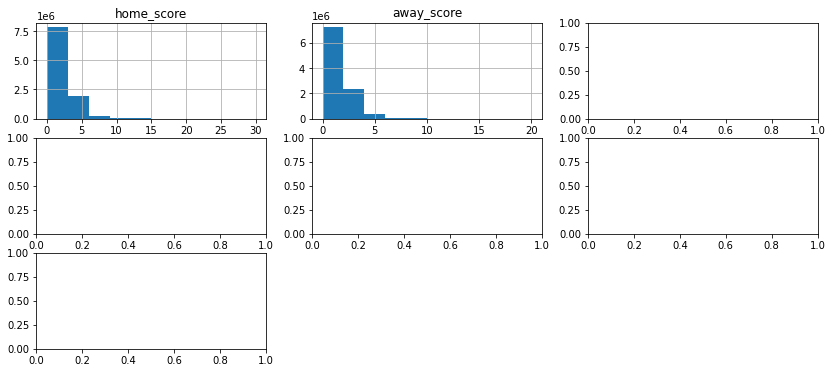

In [25]:
#Checking for data distribution
final_df2.hist(bins=10, figsize=[14,6])

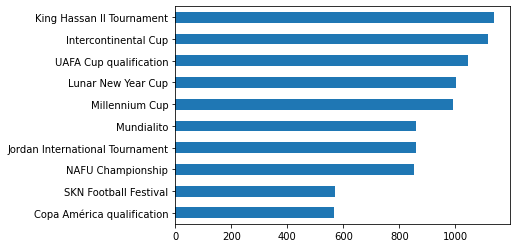

In [26]:
#Checking tournament type value counts
final_df2.tournament.value_counts().sort_values().head(10).plot(kind = 'barh')


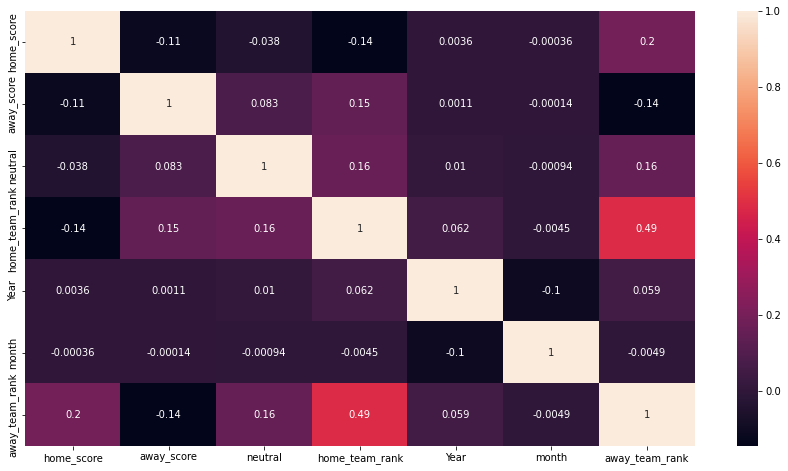

In [27]:
#Checking for feature correlation
plt.subplots(figsize=(15,8))
sns.heatmap(final_df2.corr(method='pearson'), annot=True)

##Feature Engineering

In [28]:
#creating a column(status) that shows whether the match ended in a win, loss or draw
final_df3 = final_df2
final_df3['status'] = final_df3['home_score'] - final_df3['away_score']
def HOME_TEAM(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
final_df3['status'] = final_df3.status.apply(lambda h: HOME_TEAM(h))
final_df3.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,confederation,rank_date,Year,month,away_team_rank,GAMES,status
0,Scotland,England,0,0,Friendly,False,30.0,UEFA,1993-08-08,1993.0,8.0,11.0,Friendly,Draw
1,Scotland,England,0,0,Friendly,False,28.0,UEFA,1993-09-23,1993.0,9.0,5.0,Friendly,Draw
2,Scotland,England,0,0,Friendly,False,29.0,UEFA,1993-10-22,1993.0,10.0,10.0,Friendly,Draw
3,Scotland,England,0,0,Friendly,False,25.0,UEFA,1993-11-19,1993.0,11.0,8.0,Friendly,Draw
4,Scotland,England,0,0,Friendly,False,24.0,UEFA,1993-12-23,1993.0,12.0,11.0,Friendly,Draw


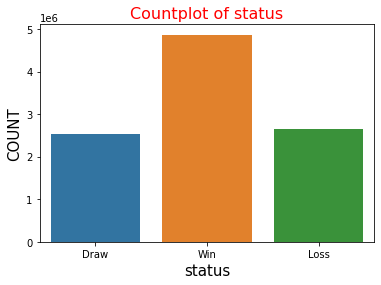

In [29]:
# visualizing the win draw and lose on a bar plot

sns.countplot('status',data = final_df3)
plt.xlabel("status",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of status",fontsize=16,color="red")
plt.show()

Possibility to win a game is high

##Checking multi-correlation

In [30]:
# displaying the correlations between the variables

corr = final_df3[['home_score','away_score','home_team_rank','away_team_rank'	]].corr()
corr

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.113590,-0.143732,0.195120
away_score,-0.113590,1.000000,0.146562,-0.139829
home_team_rank,-0.143732,0.146562,1.000000,0.490598
away_team_rank,0.195120,-0.139829,0.490598,1.000000


##Building the model

1. Polynomial Regression (Predicting Home_score)

In [31]:
#encode tournament, neutral and status
#label encoding
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

final_df4 = final_df3

# apply le on categorical feature columns
final_df4['tournament'] = le.fit_transform(final_df4['tournament'])
final_df4['neutral'] = le.fit_transform(final_df4['neutral'])
final_df4['home_team'] = le.fit_transform(final_df4['home_team'])
final_df4['away_team'] = le.fit_transform(final_df4['away_team'])

In [32]:
#encoding status to maintain order
final_df4['status'] = final_df4['status'].replace(['Win','Draw','Loss'],[2, 1, 0])

In [33]:
#Using the necessary libraries imported before:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#defining X and y using the column locations

X = (final_df4[['home_team_rank','away_team_rank','tournament']]).values
y = final_df4['home_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model

y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix

# Let's describe our residual:

pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

Exception: ignored